# **Part 1: Introduction**

In [20]:
print('Hello World')

Hello World


### *Everything is a _cell_*

> Jupyter Notebooks help you get started with Notebooks.ai for Data Science and Python programming.
 
 Jupyter Notebooks are organized as a set of "cells". Each cell can contain different types of content: like Python code (or R, Julia, etc),
images or even human readable text (markdown), like the one you're currently reading.

In [2]:
1 + 3

4

### General shortcut keys command:
* a: insert new cell
* b: insert below cell
* m: mardown type
* y: code type
* ctrl + Enter: run
* Enter: acces row
* dd: delete
* v: paste
* z: undo

# **Part 2: Example**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* numpy is the most popular Python library for array manipulation and numeric computing
* matplotlib is the most popular visualization library in the Python ecosystem.
Let's execute a few lines of code and generate some plots:

In [15]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

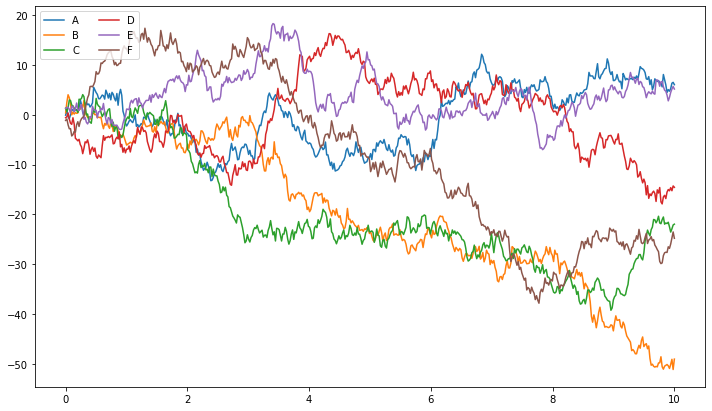

In [16]:
plt.figure(figsize = (12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol =2, loc= 'upper left')

# **Part 3: Interacting with Data**

To show the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and dowload them as excel files.
To do this we need to import two libraries:
   * requests : to pull data from the web
   * pandas: to process data

In [51]:
import requests
import pandas as pd

* Predifine functin that simplifies the process of importing data from Cryptowatch.

In [33]:
def get_historic_price(symbol, exchange ='bitfinex', after ='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol = symbol, exchange=exchange)
    resp = requests.get(url, params={'preriod': '3600', 'after': str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns = ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit = 's')
    df.set_index('CloseTime', inplace = True)
    return df

* Pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days.

In [34]:
last_week = (pd.Timestamp.now() -pd.offsets.Day(7))
last_week

Timestamp('2021-09-18 01:12:29.697163')

In [35]:
btc = get_historic_price ('btc', 'bitstamp', after = last_week)

In [36]:
eth = get_historic_price('eth', 'bitstamp', after = last_week)

#### Bitcoin:

In [37]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-09-18 02:00:00,47374.00,47687.89,47345.60,47623.81,41.199507,1.958788e+06
2021-09-18 03:00:00,47642.50,47702.97,47520.00,47666.92,80.349023,3.825109e+06
2021-09-18 04:00:00,47692.63,48000.00,47676.75,47944.80,71.598084,3.425289e+06
2021-09-18 05:00:00,47944.80,48356.55,47933.83,48349.16,69.326937,3.339474e+06
2021-09-18 06:00:00,48349.25,48783.10,48302.84,48681.01,125.465284,6.085580e+06


In [39]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02
mean,44754.872346,45016.222037,44427.370988,44725.256173,135.324902,5.895097e+06
std,2365.376621,2268.539167,2479.789561,2368.624526,140.068586,5.907335e+06
min,40487.890000,41063.180000,39573.210000,40493.310000,7.963641,3.830566e+05
25%,43018.107500,43300.000000,42469.250000,42944.017500,51.701635,2.328922e+06
50%,44066.570000,44275.065000,43735.930000,44057.370000,83.118123,3.723671e+06
75%,47374.030000,47669.397500,47286.132500,47386.367500,158.289783,6.719508e+06
max,48696.840000,48834.000000,48596.770000,48683.210000,763.843250,3.172174e+07


<AxesSubplot:xlabel='CloseTime'>

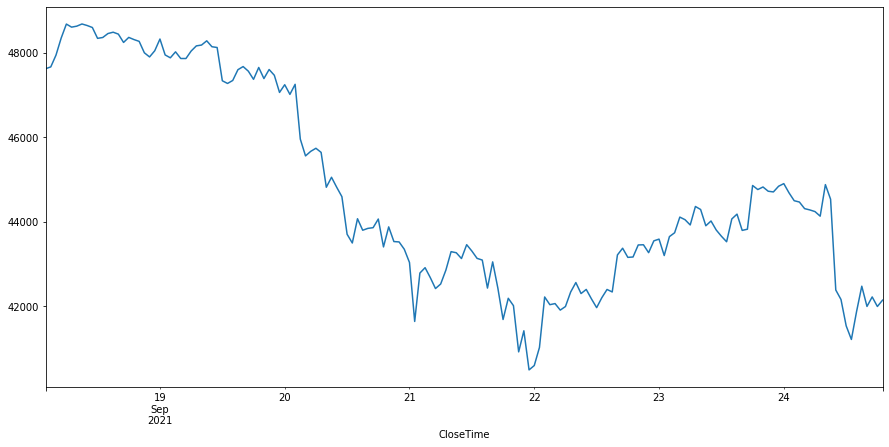

In [38]:
btc['ClosePrice'].plot(figsize=(15,7))

In [40]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-09-18 02:00:00,3408.44,3424.11,3395.78,3410.66,1911.976933,6.523643e+06
2021-09-18 03:00:00,3411.44,3436.34,3407.07,3420.49,582.645319,1.991754e+06
2021-09-18 04:00:00,3422.85,3453.01,3418.60,3451.64,752.769288,2.591113e+06
2021-09-18 05:00:00,3452.67,3494.89,3449.22,3481.52,894.491019,3.105777e+06
2021-09-18 06:00:00,3482.65,3519.00,3470.02,3511.60,995.400244,3.474978e+06


In [41]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02
mean,3142.365247,3166.712654,3112.679136,3139.056852,1750.823069,5.363320e+06
std,208.169409,200.297074,216.889459,208.262041,2510.364246,7.528541e+06
min,2724.000000,2770.020000,2650.000000,2720.070000,82.794636,2.387586e+05
25%,3010.775000,3038.287500,2965.000000,3006.092500,448.699032,1.421103e+06
50%,3093.455000,3118.900000,3065.600000,3092.520000,801.679594,2.478246e+06
75%,3343.387500,3365.997500,3333.087500,3343.057500,2049.057981,5.960710e+06
max,3525.370000,3545.700000,3512.310000,3525.370000,20165.705652,5.657834e+07


<AxesSubplot:xlabel='CloseTime'>

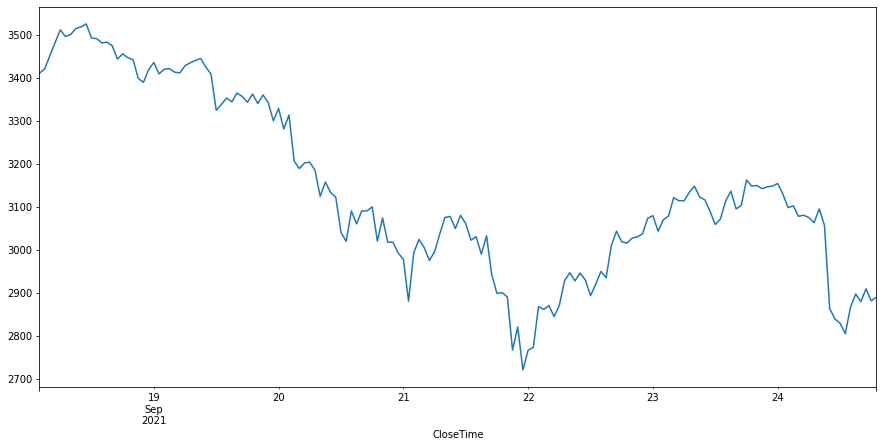

In [43]:
eth['ClosePrice'].plot(figsize=(15,7))

# **Part 4: Exporting to Excel**

To generate an Excel file from the dowloaded prices. Working with Excel and other formats (like CSV or Json) is 
extremely simple in Jupyter Lab(with Pandas and Python). Our first step will be called openpyxl to create an 'Excel writer', a component from the pandas package by doing a command:
> pip install openpyxl

In [61]:
writer = pd.ExcelWriter('cryptos_2.xlsx')

Then we'll now write both bitcoin and ether data as separate sheets:

In [62]:
btc.to_excel(writer, encoding='UTF-8', sheet_name = 'Bitcoin')

In [63]:
eth.to_excel(writer, encoding='UTF-8', sheet_name = 'Ether')

In [64]:
writer.save()